In [1]:
# %%capture
# pip install NeuralForecast

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae,mse


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
X_df = pd.read_csv('@datasets_reproducibity/ECL/S/df_x.csv')
Y_df = pd.read_csv('@datasets_reproducibity/ECL/S/df_y.csv')

In [5]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...
26299,2019-07-01 21:00:00,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,-0.500000,-0.333333,-0.466667,-0.00137


In [6]:
Y_df

,ds,unique_id,y
0,2016-07-01 02:00:00,OT,-2.162911
1,2016-07-01 03:00:00,OT,-0.949045
2,2016-07-01 04:00:00,OT,-1.077105
3,2016-07-01 05:00:00,OT,-1.129411
4,2016-07-01 06:00:00,OT,-1.154662
...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872
26300,2019-07-01 22:00:00,OT,-1.093338
26301,2019-07-01 23:00:00,OT,-1.282723
26302,2019-07-02 00:00:00,OT,-1.158270


In [7]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [8]:
Y_df['ex_1']=X_df['ex_1']
Y_df['ex_2']=X_df['ex_2']
Y_df['ex_3']=X_df['ex_3']
Y_df['ex_4']=X_df['ex_4']

Y_df=Y_df.dropna()

In [9]:
Y_df['ds'] = pd.to_datetime(Y_df['ds'])


## Horizon 96

In [85]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [86]:
Y_train_df = Y_df.iloc[:26208,:]
Y_test_df = Y_df.iloc[26208:,:]

In [87]:
Y_test_df = Y_test_df.reset_index()

In [88]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,26208,2019-06-28 02:00:00,OT,-0.929204,-0.413043,0.166667,0.400000,-0.012329
1,26209,2019-06-28 03:00:00,OT,-0.974296,-0.369565,0.166667,0.400000,-0.012329
2,26210,2019-06-28 04:00:00,OT,-0.884113,-0.326087,0.166667,0.400000,-0.012329
3,26211,2019-06-28 05:00:00,OT,-1.210576,-0.282609,0.166667,0.400000,-0.012329
4,26212,2019-06-28 06:00:00,OT,-1.113178,-0.239130,0.166667,0.400000,-0.012329
...,...,...,...,...,...,...,...,...
91,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
92,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
93,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
94,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [89]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-28 02:00:00,OT,-0.929204,-0.413043,0.166667,0.400000,-0.012329
1,2019-06-28 03:00:00,OT,-0.974296,-0.369565,0.166667,0.400000,-0.012329
2,2019-06-28 04:00:00,OT,-0.884113,-0.326087,0.166667,0.400000,-0.012329
3,2019-06-28 05:00:00,OT,-1.210576,-0.282609,0.166667,0.400000,-0.012329
4,2019-06-28 06:00:00,OT,-1.113178,-0.239130,0.166667,0.400000,-0.012329
...,...,...,...,...,...,...,...
91,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
92,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
93,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
94,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [90]:
horizon = 96
model = NHITS(h=horizon, input_size=24,
               max_steps=500,
                hist_exog_list=['ex_1','ex_2','ex_3','ex_4']

               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [91]:
nf = NeuralForecast(models=[model],freq='H')

In [92]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.6 M 
-----------------------------------------------
2.6 M     Trainable params
0         Non-trainable params
2.6 M     Total params
10.446    Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=500` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [93]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NHITS
unique_id,,
OT,0,-0.825690
OT,1,-0.965200
OT,2,-1.095483
OT,3,-1.192199
OT,4,-1.269621
...,...,...
OT,91,-0.467611
OT,92,-0.726522
OT,93,-0.814815


<Axes: xlabel='ds'>

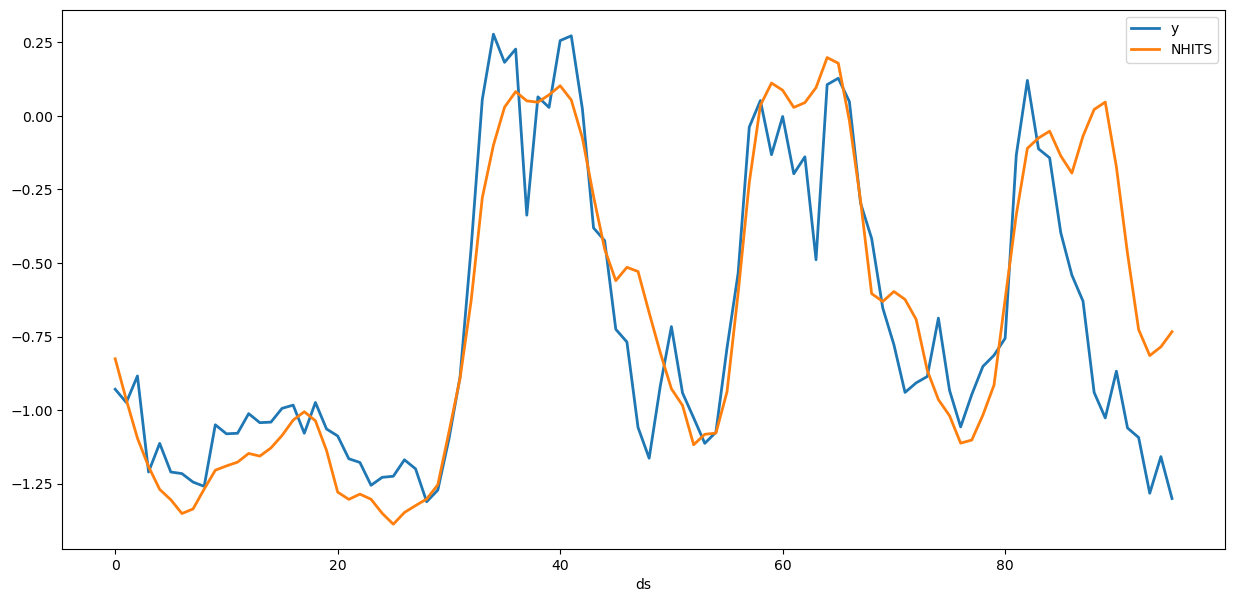

In [94]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NHITS']].plot(ax=ax, linewidth=2)

In [95]:
forecasts=forecasts.set_index('ds')
forecasts

,NHITS
ds,
0,-0.825690
1,-0.965200
2,-1.095483
3,-1.192199
4,-1.269621
...,...
91,-0.467611
92,-0.726522
93,-0.814815


In [96]:
mae_nhits = mae(Y_test_df['y'], forecasts['NHITS'])
mse_nhits = mse(Y_test_df['y'], forecasts['NHITS'])
print(f'N-Beats MAE: {mae_nhits:.3f}')
print(f'N-Beats MSE: {mse_nhits:.3f}')

N-Beats MAE: 0.186
N-Beats MSE: 0.072


## Horizon 192

In [97]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [98]:
Y_train_df = Y_df.iloc[:26112,:]
Y_test_df = Y_df.iloc[26112:,:]

In [99]:
Y_test_df = Y_test_df.reset_index()

In [100]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,26112,2019-06-24 02:00:00,OT,-0.857058,-0.413043,-0.500000,0.266667,-0.023288
1,26113,2019-06-24 03:00:00,OT,-0.700139,-0.369565,-0.500000,0.266667,-0.023288
2,26114,2019-06-24 04:00:00,OT,-0.402534,-0.326087,-0.500000,0.266667,-0.023288
3,26115,2019-06-24 05:00:00,OT,-0.658655,-0.282609,-0.500000,0.266667,-0.023288
4,26116,2019-06-24 06:00:00,OT,-0.763267,-0.239130,-0.500000,0.266667,-0.023288
...,...,...,...,...,...,...,...,...
187,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
188,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
189,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
190,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [101]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-24 02:00:00,OT,-0.857058,-0.413043,-0.500000,0.266667,-0.023288
1,2019-06-24 03:00:00,OT,-0.700139,-0.369565,-0.500000,0.266667,-0.023288
2,2019-06-24 04:00:00,OT,-0.402534,-0.326087,-0.500000,0.266667,-0.023288
3,2019-06-24 05:00:00,OT,-0.658655,-0.282609,-0.500000,0.266667,-0.023288
4,2019-06-24 06:00:00,OT,-0.763267,-0.239130,-0.500000,0.266667,-0.023288
...,...,...,...,...,...,...,...
187,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
188,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
189,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
190,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [109]:
horizon = 192
model = NHITS(h=horizon, input_size=24,
               max_steps=500,
                hist_exog_list=['ex_1','ex_2','ex_3','ex_4']

               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [110]:
nf = NeuralForecast(models=[model],freq='H')

In [111]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.7 M 
-----------------------------------------------
2.7 M     Trainable params
0         Non-trainable params
2.7 M     Total params
10.790    Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=500` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [112]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NHITS
unique_id,,
OT,0,-0.835818
OT,1,-0.848281
OT,2,-0.834705
OT,3,-0.833292
OT,4,-0.855791
...,...,...
OT,187,-0.333576
OT,188,-0.555467
OT,189,-0.753187


<Axes: xlabel='ds'>

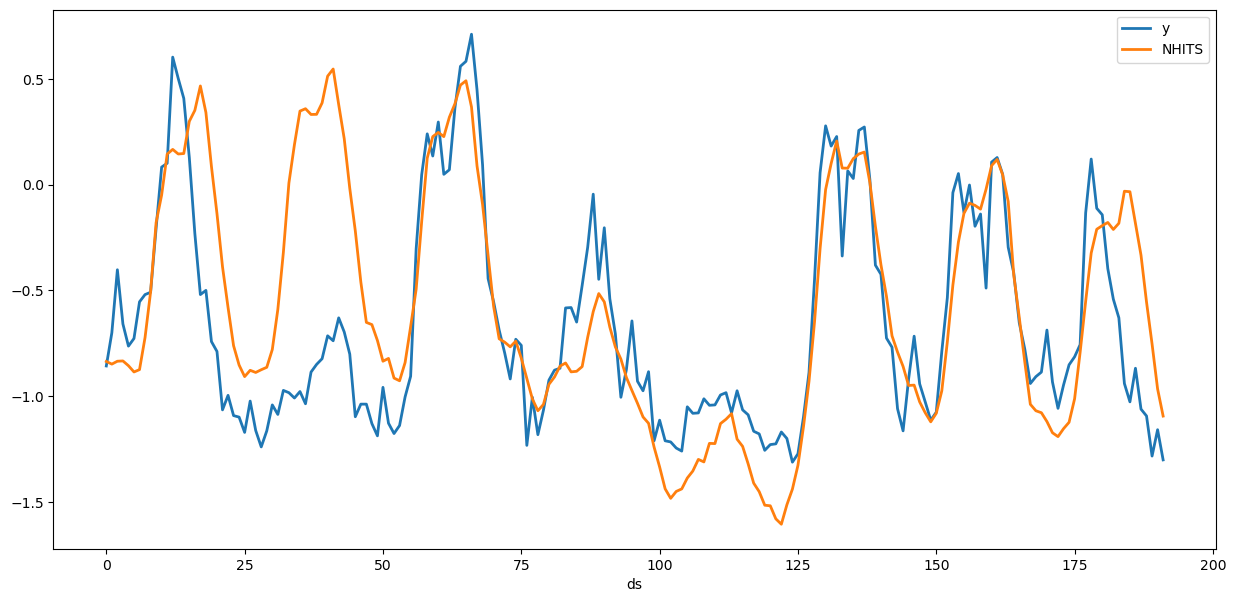

In [113]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NHITS']].plot(ax=ax, linewidth=2)

In [114]:
forecasts=forecasts.set_index('ds')
forecasts

,NHITS
ds,
0,-0.835818
1,-0.848281
2,-0.834705
3,-0.833292
4,-0.855791
...,...
187,-0.333576
188,-0.555467
189,-0.753187


In [115]:
mae_nhits = mae(Y_test_df['y'], forecasts['NHITS'])
mse_nhits = mse(Y_test_df['y'], forecasts['NHITS'])
print(f'Nhits MAE: {mae_nhits:.3f}')
print(f'Nhits MSE: {mse_nhits:.3f}')

Nhits MAE: 0.292
Nhits MSE: 0.174


## Horizon 336

In [10]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [11]:
Y_train_df = Y_df.iloc[:25967,:]
Y_test_df = Y_df.iloc[25967:,:]

In [12]:
Y_test_df = Y_test_df.reset_index()

In [13]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,25967,2019-06-18 01:00:00,OT,-0.844432,-0.456522,-0.333333,0.066667,-0.039726
1,25968,2019-06-18 02:00:00,OT,-0.844432,-0.413043,-0.333333,0.066667,-0.039726
2,25969,2019-06-18 03:00:00,OT,-0.869683,-0.369565,-0.333333,0.066667,-0.039726
3,25970,2019-06-18 04:00:00,OT,-0.727194,-0.326087,-0.333333,0.066667,-0.039726
4,25971,2019-06-18 05:00:00,OT,-0.830003,-0.282609,-0.333333,0.066667,-0.039726
...,...,...,...,...,...,...,...,...
332,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
333,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
334,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
335,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [14]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-18 01:00:00,OT,-0.844432,-0.456522,-0.333333,0.066667,-0.039726
1,2019-06-18 02:00:00,OT,-0.844432,-0.413043,-0.333333,0.066667,-0.039726
2,2019-06-18 03:00:00,OT,-0.869683,-0.369565,-0.333333,0.066667,-0.039726
3,2019-06-18 04:00:00,OT,-0.727194,-0.326087,-0.333333,0.066667,-0.039726
4,2019-06-18 05:00:00,OT,-0.830003,-0.282609,-0.333333,0.066667,-0.039726
...,...,...,...,...,...,...,...
332,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
333,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
334,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
335,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [78]:
horizon = 336
model = NHITS(h=horizon, input_size=24,
               max_steps=500,
              hist_exog_list=['ex_1','ex_2','ex_3','ex_4']
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [79]:
nf = NeuralForecast(models=[model],freq='H')

In [80]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.8 M 
-----------------------------------------------
2.8 M     Trainable params
0         Non-trainable params
2.8 M     Total params
11.308    Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=500` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [81]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NHITS
unique_id,,
OT,0,-0.831296
OT,1,-0.903279
OT,2,-0.895759
OT,3,-0.833062
OT,4,-0.872842
...,...,...
OT,331,0.046746
OT,332,-0.310461
OT,333,-0.511915


<Axes: xlabel='ds'>

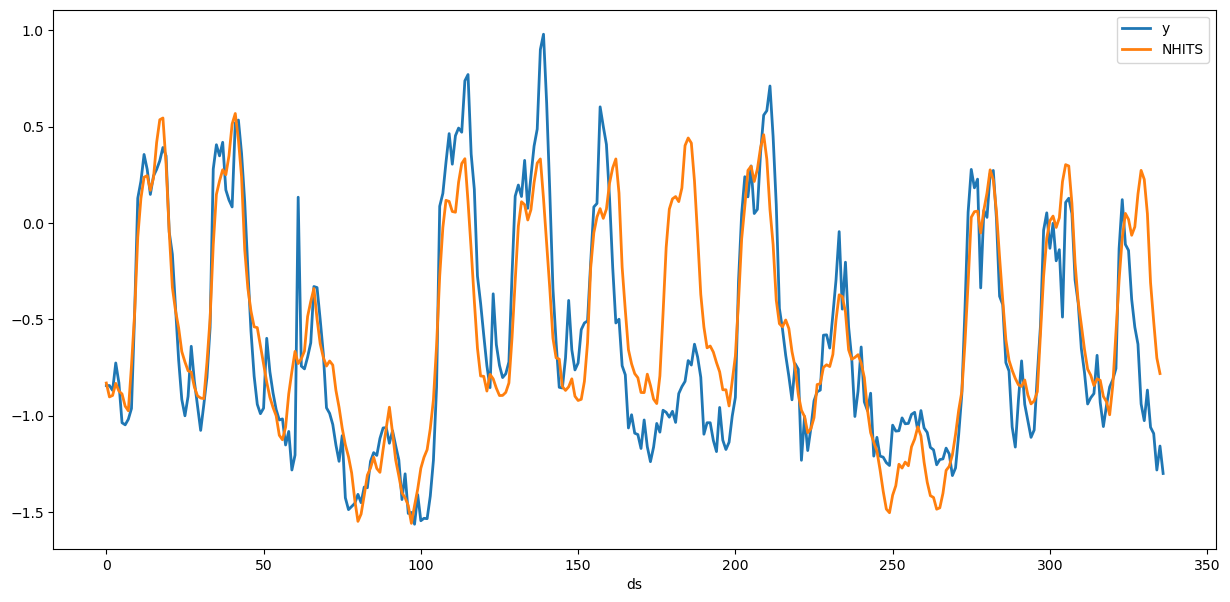

In [82]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NHITS']].plot(ax=ax, linewidth=2)

In [83]:
forecasts=forecasts.set_index('ds')
forecasts

,NHITS
ds,
0,-0.831296
1,-0.903279
2,-0.895759
3,-0.833062
4,-0.872842
...,...
331,0.046746
332,-0.310461
333,-0.511915


In [84]:
from neuralforecast.losses.numpy import mae,mse


mae_nhits = mae(Y_test_df['y'], forecasts['NHITS'])
mse_nhits = mse(Y_test_df['y'], forecasts['NHITS'])
print(f'Nhits MAE: {mae_nhits:.3f}')
print(f'Nhits MSE: {mse_nhits:.3f}')

Nhits MAE: 0.238
Nhits MSE: 0.113


## Horizon 720

In [116]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [117]:
Y_train_df = Y_df.iloc[:25583,:]
Y_test_df = Y_df.iloc[25583:,:]

In [118]:
Y_test_df = Y_test_df.reset_index()

In [119]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,25583,2019-06-02 01:00:00,OT,-1.010369,-0.456522,0.500000,-0.466667,-0.083562
1,25584,2019-06-02 02:00:00,OT,-1.142037,-0.413043,0.500000,-0.466667,-0.083562
2,25585,2019-06-02 03:00:00,OT,-0.936419,-0.369565,0.500000,-0.466667,-0.083562
3,25586,2019-06-02 04:00:00,OT,-0.743427,-0.326087,0.500000,-0.466667,-0.083562
4,25587,2019-06-02 05:00:00,OT,-0.970689,-0.282609,0.500000,-0.466667,-0.083562
...,...,...,...,...,...,...,...,...
716,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
717,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
718,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
719,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [120]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-02 01:00:00,OT,-1.010369,-0.456522,0.500000,-0.466667,-0.083562
1,2019-06-02 02:00:00,OT,-1.142037,-0.413043,0.500000,-0.466667,-0.083562
2,2019-06-02 03:00:00,OT,-0.936419,-0.369565,0.500000,-0.466667,-0.083562
3,2019-06-02 04:00:00,OT,-0.743427,-0.326087,0.500000,-0.466667,-0.083562
4,2019-06-02 05:00:00,OT,-0.970689,-0.282609,0.500000,-0.466667,-0.083562
...,...,...,...,...,...,...,...
716,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
717,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
718,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
719,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [121]:
horizon = 720
model = NHITS(h=horizon, input_size=24,
               max_steps=700,
              hist_exog_list=['ex_1','ex_2','ex_3','ex_4']
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [122]:
nf = NeuralForecast(models=[model],freq='H')

In [123]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 3.2 M 
-----------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.687    Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=700` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [124]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NHITS
unique_id,,
OT,0,-0.793947
OT,1,-0.853095
OT,2,-0.916031
OT,3,-0.951470
OT,4,-0.980719
...,...,...
OT,715,-0.127573
OT,716,-0.375448
OT,717,-0.545842


<Axes: xlabel='ds'>

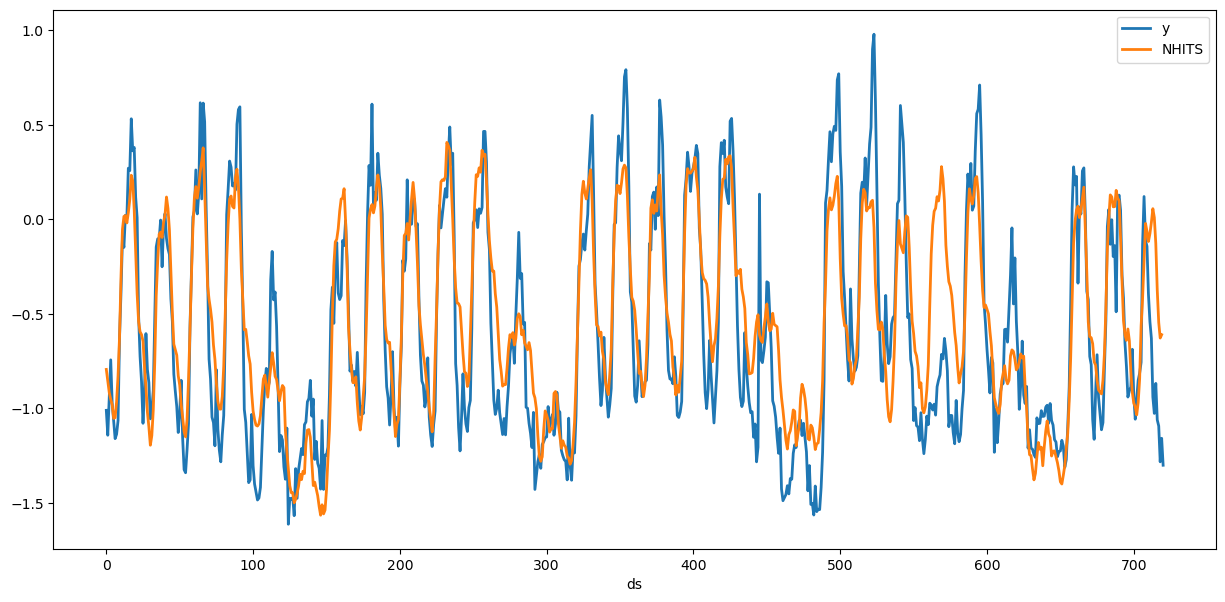

In [125]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NHITS']].plot(ax=ax, linewidth=2)

In [126]:
forecasts=forecasts.set_index('ds')
forecasts

,NHITS
ds,
0,-0.793947
1,-0.853095
2,-0.916031
3,-0.951470
4,-0.980719
...,...
715,-0.127573
716,-0.375448
717,-0.545842


In [127]:
from neuralforecast.losses.numpy import mae,mse

mae_nhits = mae(Y_test_df['y'], forecasts['NHITS'])
mse_nhits = mse(Y_test_df['y'], forecasts['NHITS'])
print(f'Nhits MAE: {mae_nhits:.3f}')
print(f'Nhits MSE: {mse_nhits:.3f}')

Nhits MAE: 0.233
Nhits MSE: 0.093
